In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

df = pd.read_csv('diamonds.csv', na_values = ['unknown'])
col = df.columns.values.tolist()[1:]

In [4]:
# Columns with NaN content > null_threshold will not be used as features
null_threshold = 0.0001

corrupt_col = []
for i in col:
  if (df[i].isna().sum()/len(df) > null_threshold):
    corrupt_col.append(i)

for i in corrupt_col:
  df = df.drop(i, axis=1)

col = df.columns.values.tolist()[1:]

In [5]:
# feature data frames with one-hot encoding to concatinate once encoded
cut = pd.get_dummies(df.cut, prefix='cut')
carat_weight = pd.DataFrame(df['carat_weight'])
lab = pd.get_dummies(df.lab, prefix='lab')
depth_percent = pd.DataFrame(df['depth_percent'])
table_percent = pd.DataFrame(df['table_percent'])
meas_length = pd.DataFrame(df['meas_length'])
meas_width = pd.DataFrame(df['meas_width'])
meas_depth = pd.DataFrame(df['meas_depth'])
total_sales_price = pd.DataFrame(df['total_sales_price'])

# convert clarity to int 0-10
clarity = pd.DataFrame(df['clarity'])
for i in range(len(clarity)):
  grade = ['I3', 'I2', 'I1', 'IF', 'SI3', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1']
  clarity['clarity'][i] = grade.index(clarity['clarity'][i])

# convert symmetry to int 0-4
symmetry = pd.DataFrame(df['symmetry'])
for i in range(len(symmetry)):
  sym = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
  symmetry['symmetry'][i] = sym.index(symmetry['symmetry'][i])

# convert polish to int 0-4
polish = pd.DataFrame(df['polish'])
for i in range(len(polish)):
  pol = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
  polish['polish'][i] = pol.index(polish['polish'][i])

In [6]:
# combining features into cleaned dataframe for regression
frames = [clarity, carat_weight, lab, symmetry, polish, depth_percent, table_percent, meas_length, meas_width, meas_depth, total_sales_price]
clean_regression = pd.concat(frames, axis=1)

# update list of column names
col = clean_regression.columns.values.tolist()[1:]

In [7]:
# updating total_sales_price for classiffication(i.e. 1 if price > x, otherwise 0 for some threshold x)
price_threshold = 2000
#print(clean_regression.loc[[150000]])
clean_classification = clean_regression.copy()

In [8]:

for i in range(len(clean_classification)):
  if clean_classification['total_sales_price'][i] > price_threshold:
    clean_classification['total_sales_price'][i] = 1
  else:
    clean_classification['total_sales_price'][i] = 0

/var/folders/qh/_8d282g95dz3yjwwq937nb4h0000gn/T/ipykernel_34273/3606538199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_classification['total_sales_price'][i] = 0
/var/folders/qh/_8d282g95dz3yjwwq937nb4h0000gn/T/ipykernel_34273/3606538199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_classification['total_sales_price'][i] = 1


In [16]:
clean_regression.head(10)

,clarity,carat_weight,lab_GIA,lab_HRD,lab_IGI,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,9,0.09,0,0,1,3,3,62.7,59.0,2.85,2.87,1.79,200
1,9,0.09,0,0,1,3,3,61.9,59.0,2.84,2.89,1.78,200
2,9,0.09,0,0,1,3,3,61.1,59.0,2.88,2.90,1.77,200
3,9,0.09,0,0,1,3,3,62.0,59.0,2.86,2.88,1.78,200
4,9,0.09,0,0,1,3,4,64.9,58.5,2.79,2.83,1.82,200
5,9,0.09,0,0,1,3,3,60.8,57.0,2.95,2.99,1.81,200
6,9,0.09,0,0,1,3,3,64.0,57.0,2.85,2.88,1.84,200
7,9,0.09,0,0,1,3,3,62.1,59.5,2.86,2.89,1.78,200
8,9,0.09,0,0,1,3,3,63.5,59.5,2.89,2.92,1.85,200
9,9,0.09,0,0,1,3,3,63.2,57.0,2.83,2.87,1.80,200


In [24]:
clean_regression.tail(10)

,clarity,carat_weight,lab_GIA,lab_HRD,lab_IGI,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
219693,3,12.52,1,0,0,4,4,62.1,58.0,14.84,14.91,9.24,1121792
219694,3,12.52,0,1,0,4,4,62.1,58.0,14.84,14.91,9.24,1121792
219695,10,10.00,1,0,0,3,4,78.1,60.0,11.78,10.84,8.47,1124122
219696,7,18.88,1,0,0,4,4,57.1,55.0,21.34,15.23,8.69,1132347
219697,8,10.04,1,0,0,4,4,72.8,55.0,14.13,10.86,7.90,1161102
219698,8,10.65,1,0,0,4,4,61.3,58.0,14.06,14.18,8.66,1210692
219699,7,5.17,1,0,0,3,3,64.8,65.0,11.55,8.81,5.71,1292500
219700,8,18.07,1,0,0,4,4,60.2,59.0,17.06,17.10,10.20,1315496
219701,5,0.90,1,0,0,2,2,70.8,72.0,5.22,4.90,3.47,1350000
219702,9,10.03,1,0,0,3,4,66.7,65.0,15.61,11.09,7.39,1449881


In [17]:
clean_classification.head(10)

,clarity,carat_weight,lab_GIA,lab_HRD,lab_IGI,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,9,0.09,0,0,1,3,3,62.7,59.0,2.85,2.87,1.79,0
1,9,0.09,0,0,1,3,3,61.9,59.0,2.84,2.89,1.78,0
2,9,0.09,0,0,1,3,3,61.1,59.0,2.88,2.90,1.77,0
3,9,0.09,0,0,1,3,3,62.0,59.0,2.86,2.88,1.78,0
4,9,0.09,0,0,1,3,4,64.9,58.5,2.79,2.83,1.82,0
5,9,0.09,0,0,1,3,3,60.8,57.0,2.95,2.99,1.81,0
6,9,0.09,0,0,1,3,3,64.0,57.0,2.85,2.88,1.84,0
7,9,0.09,0,0,1,3,3,62.1,59.5,2.86,2.89,1.78,0
8,9,0.09,0,0,1,3,3,63.5,59.5,2.89,2.92,1.85,0
9,9,0.09,0,0,1,3,3,63.2,57.0,2.83,2.87,1.80,0


In [18]:
clean_classification.tail(10)

,clarity,carat_weight,lab_GIA,lab_HRD,lab_IGI,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
219693,3,12.52,1,0,0,4,4,62.1,58.0,14.84,14.91,9.24,1
219694,3,12.52,0,1,0,4,4,62.1,58.0,14.84,14.91,9.24,1
219695,10,10.00,1,0,0,3,4,78.1,60.0,11.78,10.84,8.47,1
219696,7,18.88,1,0,0,4,4,57.1,55.0,21.34,15.23,8.69,1
219697,8,10.04,1,0,0,4,4,72.8,55.0,14.13,10.86,7.90,1
219698,8,10.65,1,0,0,4,4,61.3,58.0,14.06,14.18,8.66,1
219699,7,5.17,1,0,0,3,3,64.8,65.0,11.55,8.81,5.71,1
219700,8,18.07,1,0,0,4,4,60.2,59.0,17.06,17.10,10.20,1
219701,5,0.90,1,0,0,2,2,70.8,72.0,5.22,4.90,3.47,1
219702,9,10.03,1,0,0,3,4,66.7,65.0,15.61,11.09,7.39,1


In [9]:
#SVM
X = clean_classification[["clarity","carat_weight", "lab_GIA","lab_HRD","symmetry","polish","depth_percent",
                          "table_percent","meas_length","meas_width","meas_depth"]].to_numpy()
y = clean_classification["total_sales_price"]
#splitting up the data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,   
    test_size = 0.1, random_state=10, shuffle=True
)

In [68]:
print('X_train:' + str(X_train.shape))
print('y_train:' + str(y_train.shape))
print('X_test: '  + str(X_test.shape))
print('y_test: '  + str(y_test.shape))
X_train2 = X_train[0:20000, :]
y_train2 = y_train[0:20000]

X_train:(197732, 11)
y_train:(197732,)
X_test: (21971, 11)
y_test: (21971,)


In [45]:
y_2d_train = y_train2.values.reshape((y_train2.shape[0], 1))
y_2d_test = y_test.values.reshape((y_test.shape[0], 1))
print(y_2d_train.shape)
print(y_2d_test.shape)

(70000, 1)
(21971, 1)


In [12]:
# Compute the score for each example in X
def score(X, w):
    return 1.0/(1+(np.e**(-X.dot(w))))
#     return X.dot(w)

In [13]:
#SVM objective function
def svm_objective(w, X, y, lambda1=.1):
    regularizer = (lambda1/2)*np.sum(w**2)
    hinge_loss = 0
    for i in range(X.shape[0]):
#         hinge_loss += max(0, 1-y[i,]*(score(X[i,], w)))
        hinge_loss += max(0, 1-y[i,]*(X[i,].dot(w)))
    result = regularizer + hinge_loss
    return result

In [14]:
# stochastic sub-gradient descent
def pegasos(X_train, y_train, lambda1=0.08, num_iters = 3):

    # Hyperparameters: threshold, lambda1
    
    # parameters
    N = X_train.shape[0]
    d = X_train.shape[1]

    t = 0
    # Initial weight vector
    w = np.ones((d,))
    
    for iter in range(num_iters):
     
        print('Iteration %d. J: %.6f' % (iter, svm_objective(w, X_train, y_train)))
        a = [0]*N
        for i in range (N):
            t = t + 1
            # finding w.
            learning_rate = 1/(lambda1*t)
#             if (y_train[i,]*score(X_train[i,], w) >= 1):
            if (y_train[i,]*X_train[i,].dot(w) >= 1):
                w = w - learning_rate*lambda1*w
            else:
                w = w - learning_rate*(lambda1*w-y_train[i,]*(X_train[i,])) 
                
    
    return w


In [69]:
from sklearn import svm
# linear kernel svm C = 1.0
svc = svm.SVC(probability=False,  kernel="linear")

In [70]:
svc.fit(X_train2,y_train2)

SVC(kernel='linear')

In [71]:
#Train accuracy
print("C = 1.0")
yhat_train = svc.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))
#Test accuracy
yhat_ts = svc.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 1.0
Train Accuaracy = 0.940100
Test Accuaracy = 0.940057


In [72]:
# linear kernel svm C = 0.1
svc = svm.SVC(C = 0.1, probability=False,  kernel="linear")
svc.fit(X_train2,y_train2)

SVC(C=0.1, kernel='linear')

In [73]:
#Train accuracy
print("C = 0.1")
yhat_train = svc.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))
#Test accuracy
yhat_ts = svc.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.1
Train Accuaracy = 0.936700
Test Accuaracy = 0.936780


In [74]:
# linear kernel svm C = 0.01
svc = svm.SVC(C = 0.01, probability=False,  kernel="linear")
svc.fit(X_train2,y_train2)

SVC(C=0.01, kernel='linear')

In [75]:
#Train accuracy
print("C = 0.01")
yhat_train = svc.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))
#Test accuracy
yhat_ts = svc.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.01
Train Accuaracy = 0.926400
Test Accuaracy = 0.926995


In [76]:
# linear kernel svm C = 0.001
svc = svm.SVC(C = 0.001, probability=False,  kernel="linear")
svc.fit(X_train2,y_train2)

SVC(C=0.001, kernel='linear')

In [77]:
#test Accuracy
print("C = 0.001")
yhat_train = svc.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.001
Train Accuaracy = 0.917500
Test Accuaracy = 0.918256


In [78]:
# linear kernel svm C = 0.0001
svc = svm.SVC(C = 0.0001, probability=False,  kernel="linear")
svc.fit(X_train2,y_train2)

SVC(C=0.0001, kernel='linear')

In [79]:
#test Accuracy
print("C = 0.0001")
yhat_train = svc.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.0001
Train Accuaracy = 0.858300
Test Accuaracy = 0.862045


In [80]:
# linear kernel svm C = 0.00001
svc = svm.SVC(C = 0.00001, probability=False,  kernel="linear")
svc.fit(X_train2,y_train2)

SVC(C=1e-05, kernel='linear')

In [81]:
#test Accuracy
print("C = 0.00001")
yhat_train = svc.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.00001
Train Accuaracy = 0.726450
Test Accuaracy = 0.726503


In [82]:
# linear kernel svm C = 10.0
svc = svm.SVC(C = 10.0, probability=False,  kernel="linear")
svc.fit(X_train2,y_train2)

SVC(C=10.0, kernel='linear')

In [83]:
#test Accuracy
print("C = 10.0")
yhat_train = svc.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 10.0
Train Accuaracy = 0.940350
Test Accuaracy = 0.940421


In [86]:
# linear kernel svm C = 100.0
svc = svm.SVC(C = 100.0, probability=False,  kernel="linear")
svc.fit(X_train2,y_train2)

SVC(C=100.0, kernel='linear')

In [87]:
#test Accuracy
print("C = 100.0")
yhat_train = svc.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 100.0
Train Accuaracy = 0.940650
Test Accuaracy = 0.940968


In [84]:
# linear kernel svm C = 1000.0
svc = svm.SVC(C = 1000.0, probability=False,  kernel="linear")
svc.fit(X_train2,y_train2)

SVC(C=1000.0, kernel='linear')

In [85]:
#test Accuracy
print("C = 1000.0")
yhat_train = svc.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 1000.0
Train Accuaracy = 0.940600
Test Accuaracy = 0.941741


In [88]:
# linear kernel svm C = 1000.0
svc = svm.SVC(C = 10000.0, probability=False,  kernel="linear")
svc.fit(X_train2,y_train2)

SVC(C=10000.0, kernel='linear')

In [89]:
#test Accuracy
print("C = 10000.0")
yhat_train = svc.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 10000.0
Train Accuaracy = 0.939250
Test Accuaracy = 0.940376


In [97]:
#degree 1 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 1, probability=False,  kernel="poly")
svc2.fit(X_train2,y_train2)

SVC(degree=1, kernel='poly')

In [99]:
#test Accuracy
print("degree = 1")
yhat_train = svc2.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 1
Train Accuaracy = 0.875400
Test Accuaracy = 0.879022


In [100]:
#degree 2 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 2, probability=False,  kernel="poly")
svc2.fit(X_train2,y_train2)

SVC(degree=2, kernel='poly')

In [101]:
#test Accuracy
print("degree = 2")
yhat_train = svc2.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 2
Train Accuaracy = 0.896250
Test Accuaracy = 0.898002


In [107]:
#degree 3 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 3, probability=False,  kernel="poly") 
svc2.fit(X_train2,y_train2)

SVC(kernel='poly')

In [108]:
#test Accuracy
print("degree = 3")
yhat_train = svc2.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 3
Train Accuaracy = 0.909200
Test Accuaracy = 0.910928


In [109]:
#degree 4 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 4, probability=False,  kernel="poly") 
svc2.fit(X_train2,y_train2)

SVC(degree=4, kernel='poly')

In [110]:
#test Accuracy
print("degree = 4")
yhat_train = svc2.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 4
Train Accuaracy = 0.914550
Test Accuaracy = 0.916481


In [111]:
#degree 5 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 5, probability=False,  kernel="poly") 
svc2.fit(X_train2,y_train2)

SVC(degree=5, kernel='poly')

In [112]:
#test Accuracy
print("degree = 5")
yhat_train = svc2.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 5
Train Accuaracy = 0.917100
Test Accuaracy = 0.918757


In [113]:
#degree 6 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 6, probability=False,  kernel="poly") 
svc2.fit(X_train2,y_train2)

SVC(degree=6, kernel='poly')

In [114]:
#test Accuracy
print("degree = 6")
yhat_train = svc2.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 6
Train Accuaracy = 0.918600
Test Accuaracy = 0.919212


In [115]:
#degree 7 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 7, probability=False,  kernel="poly") 
svc2.fit(X_train2,y_train2)

SVC(degree=7, kernel='poly')

In [116]:
#test Accuracy
print("degree = 7")
yhat_train = svc2.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 7
Train Accuaracy = 0.919350
Test Accuaracy = 0.921396


In [118]:
#degree 8 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 8, probability=False,  kernel="poly") 
svc2.fit(X_train2,y_train2)

SVC(degree=8, kernel='poly')

In [119]:
#test Accuracy
print("degree = 8")
yhat_train = svc2.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 8
Train Accuaracy = 0.920350
Test Accuaracy = 0.921624


In [120]:
#degree 9 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 9, probability=False,  kernel="poly") 
svc2.fit(X_train2,y_train2)

SVC(degree=9, kernel='poly')

In [121]:
#test Accuracy
print("degree = 9")
yhat_train = svc2.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 9
Train Accuaracy = 0.921000
Test Accuaracy = 0.922944


In [122]:
#degree 10 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 10, probability=False,  kernel="poly") 
svc2.fit(X_train2,y_train2)

SVC(degree=10, kernel='poly')

In [123]:
#test Accuracy
print("degree = 10")
yhat_train = svc2.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 10
Train Accuaracy = 0.922750
Test Accuaracy = 0.925129


In [126]:
# C = 10000.0 rbf 
svc3 = svm.SVC(C = 10000.0, probability=False,  kernel="rbf")
svc3.fit(X_train2,y_train2)

SVC(C=10000.0)

In [127]:
print("C = 10000")
yhat_train = svc3.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc3.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 10000
Train Accuaracy = 0.941450
Test Accuaracy = 0.940239


In [128]:
# C = 1000.0 rbf 
svc3 = svm.SVC(C = 1000.0, probability=False,  kernel="rbf")
svc3.fit(X_train2,y_train2)

SVC(C=1000.0)

In [129]:
print("C = 1000")
yhat_train = svc3.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc3.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 1000
Train Accuaracy = 0.940950
Test Accuaracy = 0.939966


In [136]:
# C = 100.0 rbf 
svc3 = svm.SVC(C = 100.0, probability=False,  kernel="rbf")
svc3.fit(X_train2,y_train2)

SVC(C=100.0)

In [137]:
print("C = 100")
yhat_train = svc3.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc3.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 100
Train Accuaracy = 0.936650
Test Accuaracy = 0.935142


In [138]:
# C = 10.0 rbf 
svc3 = svm.SVC(C = 10.0, probability=False,  kernel="rbf")
svc3.fit(X_train2,y_train2)

SVC(C=10.0)

In [139]:
print("C = 10")
yhat_train = svc3.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc3.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 10
Train Accuaracy = 0.928650
Test Accuaracy = 0.927996


In [140]:
# C = 1.0 rbf 
svc3 = svm.SVC(C = 1.0, probability=False,  kernel="rbf")
svc3.fit(X_train2,y_train2)

SVC()

In [141]:
print("C = 1")
yhat_train = svc3.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc3.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 1
Train Accuaracy = 0.900850
Test Accuaracy = 0.900778


In [142]:
# C = 0.1 rbf 
svc3 = svm.SVC(C = 0.1, probability=False,  kernel="rbf")
svc3.fit(X_train2,y_train2)

SVC(C=0.1)

In [143]:
print("C = 0.1")
yhat_train = svc3.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc3.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.1
Train Accuaracy = 0.830100
Test Accuaracy = 0.831824


In [144]:
# C = 0.01 rbf 
svc3 = svm.SVC(C = 0.01, probability=False,  kernel="rbf")
svc3.fit(X_train2,y_train2)

SVC(C=0.01)

In [145]:
print("C = 0.01")
yhat_train = svc3.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc3.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.01
Train Accuaracy = 0.592350
Test Accuaracy = 0.593828


In [146]:
# C = 0.001 rbf 
svc3 = svm.SVC(C = 0.001, probability=False,  kernel="rbf")
svc3.fit(X_train2,y_train2)

SVC(C=0.001)

In [147]:
print("C = 0.001")
yhat_train = svc3.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc3.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.001
Train Accuaracy = 0.500700
Test Accuaracy = 0.503209


In [152]:
# C = 0.0001 rbf 
svc3 = svm.SVC(C = 0.0001, probability=False,  kernel="rbf")
svc3.fit(X_train2,y_train2)

SVC(C=0.0001)

In [153]:
print("C = 0.0001")
yhat_train = svc3.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc3.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.0001
Train Accuaracy = 0.500700
Test Accuaracy = 0.503209


In [154]:
# C = 0.00001 rbf 
svc3 = svm.SVC(C = 0.00001, probability=False,  kernel="rbf")
svc3.fit(X_train2,y_train2)

SVC(C=1e-05)

In [155]:
print("C = 0.00001")
yhat_train = svc3.predict(X_train2)
acc = np.mean(yhat_train == y_train2)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc3.predict(X_test)
acc = np.mean(yhat_ts == y_test)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.00001
Train Accuaracy = 0.500700
Test Accuaracy = 0.503209


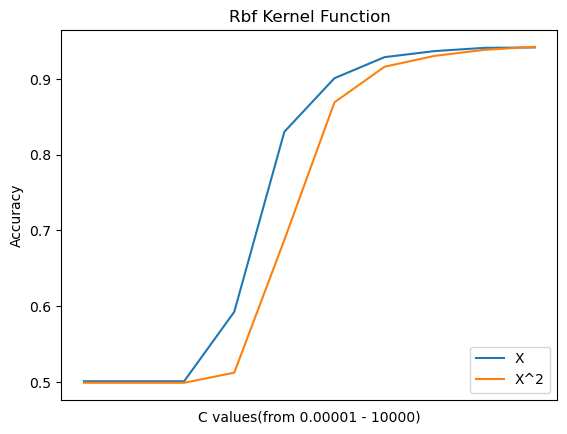

In [250]:
x_1 = [0,1,2,3,4,5,6,7,8,9]
y_1_train = [0.500700,0.500700,0.500700,0.592350,0.830100,0.900850,0.928650,0.936650,0.940950,0.941450]
y_1_trans = [0.498667,0.498667,0.498667,0.512000,0.687333,0.869000,0.916000,0.930333,0.938333,0.942333]
plt.plot(x_1,y_1_train, label="X")
plt.plot(x_1,y_1_trans, label="X^2")
ax = plt.gca()
#hide x-axis
ax.set_xticks([])
plt.ylabel("Accuracy")
plt.xlabel("C values(from 0.00001 - 10000)")
plt.title("Rbf Kernel Function")
plt.legend(loc='lower right')
plt.show()

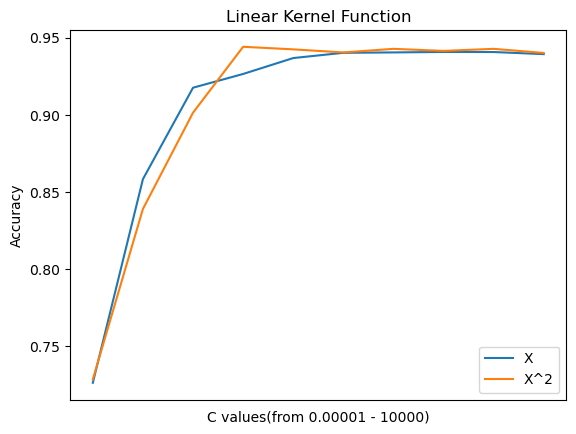

In [278]:
x_2 = [0,1,2,3,4,5,6,7,8,9]
y_2_train = [0.726450,0.858300,0.917500,0.926400,0.936700,0.940100,0.940350,0.940650,0.940600,0.939250]
y_2_trans = [0.728667,0.839000,0.901333,0.944000,0.942333,0.940333,0.942667,0.941333,0.942667,0.940000]
plt.plot(x_2,y_2_train,label = "X")
plt.plot(x_2,y_2_trans, label = "X^2")
ax = plt.gca()
#hide x-axis
ax.set_xticks([])
plt.ylabel("Accuracy")
plt.xlabel("C values(from 0.00001 - 10000)")
plt.title("Linear Kernel Function")
plt.legend(loc='lower right')
plt.show()

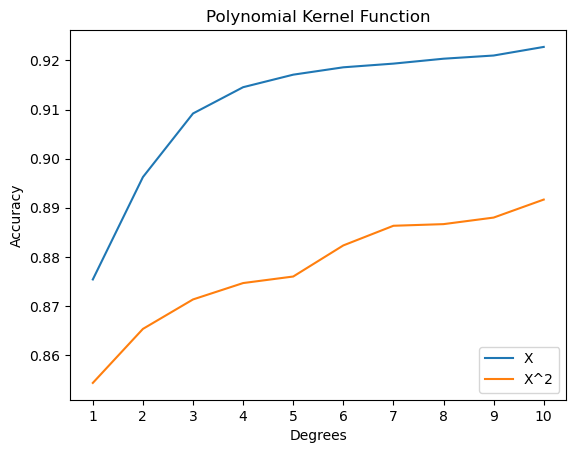

In [276]:
x_3 = [1,2,3,4,5,6,7,8,9,10]
y_3_train = [0.875400,0.896250,0.909200,0.914550,0.917100,0.918600,0.919350,0.920350,0.921000,0.922750]
y_3_trans = [0.854333,0.865333,0.871333,0.874667,0.876000,0.882333,0.886333,0.886667,0.888000,0.891667]
plt.plot(x_3,y_3_train, label="X")
plt.plot(x_3,y_3_trans, label="X^2")
ax = plt.gca()
plt.ylabel("Accuracy")
plt.xlabel("Degrees")
plt.title("Polynomial Kernel Function")
plt.legend(loc='lower right')
plt.xticks(np.arange(1, 11, step=1))
plt.show()

In [207]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train2_s = poly.fit_transform(X_train2)
X_test2 = poly.fit_transform(X_test)
X_test3 = X_test2[0:3000,:]
y_test3 = y_test[0:3000]
print(X_test2.shape)

(21971, 78)


In [198]:
X_train3 = X_train2_s[0:5000, :]
y_train3 = y_train2[0:5000]

In [199]:
# linear kernel svm C = 0.00001
svc = svm.SVC(C = 0.00001, probability=False,  kernel="linear")
svc.fit(X_train3,y_train3)

SVC(C=1e-05, kernel='linear')

In [209]:
print("C = 0.00001, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.00001, X^2
Train Accuaracy = 0.919800
Test Accuaracy = 0.928667


In [210]:
# linear kernel svm C = 0.0001
svc = svm.SVC(C = 0.0001, probability=False,  kernel="linear")
svc.fit(X_train3,y_train3)

SVC(C=0.0001, kernel='linear')

In [211]:
print("C = 0.0001, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.0001, X^2
Train Accuaracy = 0.933600
Test Accuaracy = 0.939000


In [212]:
# linear kernel svm C = 0.001
svc = svm.SVC(C = 0.001, probability=False,  kernel="linear")
svc.fit(X_train3,y_train3)

SVC(C=0.001, kernel='linear')

In [213]:
print("C = 0.001, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.001, X^2
Train Accuaracy = 0.938000
Test Accuaracy = 0.941333


In [214]:
# linear kernel svm C = 0.01
svc = svm.SVC(C = 0.01, probability=False,  kernel="linear")
svc.fit(X_train3,y_train3)

SVC(C=0.01, kernel='linear')

In [215]:
print("C = 0.01, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.01, X^2
Train Accuaracy = 0.942600
Test Accuaracy = 0.944000


In [216]:
# linear kernel svm C = 0.1
svc = svm.SVC(C = 0.1, probability=False,  kernel="linear")
svc.fit(X_train3,y_train3)

SVC(C=0.1, kernel='linear')

In [217]:
print("C = 0.1, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.1, X^2
Train Accuaracy = 0.943800
Test Accuaracy = 0.942333


In [218]:
# linear kernel svm C = 1
svc = svm.SVC(C = 1, probability=False,  kernel="linear")
svc.fit(X_train3,y_train3)

SVC(C=1, kernel='linear')

In [219]:
print("C = 1, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 1, X^2
Train Accuaracy = 0.942400
Test Accuaracy = 0.940333


In [220]:
# linear kernel svm C = 10
svc = svm.SVC(C = 10, probability=False,  kernel="linear")
svc.fit(X_train3,y_train3)

SVC(C=10, kernel='linear')

In [221]:
print("C = 10, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 10, X^2
Train Accuaracy = 0.942400
Test Accuaracy = 0.942667


In [222]:
# linear kernel svm C = 100
svc = svm.SVC(C = 100, probability=False,  kernel="linear")
svc.fit(X_train3,y_train3)

SVC(C=100, kernel='linear')

In [223]:
print("C = 100, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 100, X^2
Train Accuaracy = 0.943400
Test Accuaracy = 0.941333


In [224]:
# linear kernel svm C = 1000
svc = svm.SVC(C = 1000, probability=False,  kernel="linear")
svc.fit(X_train3,y_train3)

SVC(C=1000, kernel='linear')

In [225]:
print("C = 1000, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 1000, X^2
Train Accuaracy = 0.940000
Test Accuaracy = 0.942667


In [226]:
# linear kernel svm C = 10000
svc = svm.SVC(C = 10000, probability=False,  kernel="linear")
svc.fit(X_train3,y_train3)

SVC(C=10000, kernel='linear')

In [227]:
print("C = 10000, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 10000, X^2
Train Accuaracy = 0.939800
Test Accuaracy = 0.940000


In [231]:
# rbf kernel svm C = 10000
svc = svm.SVC(C = 10000, probability=False,  kernel="rbf")
svc.fit(X_train3,y_train3)

SVC(C=10000)

In [232]:
print("C = 10000, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 10000, X^2
Train Accuaracy = 0.943000
Test Accuaracy = 0.942333


In [233]:
# rbf kernel svm C = 1000
svc = svm.SVC(C = 1000, probability=False,  kernel="rbf")
svc.fit(X_train3,y_train3)

SVC(C=1000)

In [234]:
print("C = 1000, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 1000, X^2
Train Accuaracy = 0.935200
Test Accuaracy = 0.938333


In [235]:
# rbf kernel svm C = 100
svc = svm.SVC(C = 100, probability=False,  kernel="rbf")
svc.fit(X_train3,y_train3)

SVC(C=100)

In [236]:
print("C = 100, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 100, X^2
Train Accuaracy = 0.931200
Test Accuaracy = 0.930333


In [237]:
# rbf kernel svm C = 10
svc = svm.SVC(C = 10, probability=False,  kernel="rbf")
svc.fit(X_train3,y_train3)

SVC(C=10)

In [238]:
print("C = 10, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 10, X^2
Train Accuaracy = 0.912800
Test Accuaracy = 0.916000


In [240]:
# rbf kernel svm C = 1
svc = svm.SVC(C = 1, probability=False,  kernel="rbf")
svc.fit(X_train3,y_train3)

SVC(C=1)

In [241]:
print("C = 1, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 1, X^2
Train Accuaracy = 0.866600
Test Accuaracy = 0.869000


In [242]:
# rbf kernel svm C = 0.1
svc = svm.SVC(C = 0.1, probability=False,  kernel="rbf")
svc.fit(X_train3,y_train3)

SVC(C=0.1)

In [243]:
print("C = 0.1, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.1, X^2
Train Accuaracy = 0.693800
Test Accuaracy = 0.687333


In [244]:
# rbf kernel svm C = 0.01
svc = svm.SVC(C = 0.01, probability=False,  kernel="rbf")
svc.fit(X_train3,y_train3)

SVC(C=0.01)

In [245]:
print("C = 0.01, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.01, X^2
Train Accuaracy = 0.530800
Test Accuaracy = 0.512000


In [246]:
# rbf kernel svm C = 0.001
svc = svm.SVC(C = 0.001, probability=False,  kernel="rbf")
svc.fit(X_train3,y_train3)

SVC(C=0.001)

In [247]:
print("C = 0.001, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.001, X^2
Train Accuaracy = 0.510800
Test Accuaracy = 0.498667


In [248]:
# rbf kernel svm C = 0.0001
svc = svm.SVC(C = 0.0001, probability=False,  kernel="rbf")
svc.fit(X_train3,y_train3)

SVC(C=0.0001)

In [249]:
print("C = 0.0001, X^2")
yhat_train = svc.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

C = 0.0001, X^2
Train Accuaracy = 0.510800
Test Accuaracy = 0.498667


In [251]:
#degree 1 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 1, probability=False,  kernel="poly") 
svc2.fit(X_train3,y_train3)

SVC(degree=1, kernel='poly')

In [253]:
print("degree = 1, X^2")
yhat_train = svc2.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 1, X^2
Train Accuaracy = 0.849000
Test Accuaracy = 0.854333


In [254]:
#degree 2 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 2, probability=False,  kernel="poly") 
svc2.fit(X_train3,y_train3)

SVC(degree=2, kernel='poly')

In [255]:
print("degree = 2, X^2")
yhat_train = svc2.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 2, X^2
Train Accuaracy = 0.861000
Test Accuaracy = 0.865333


In [256]:
#degree 3 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 3, probability=False,  kernel="poly") 
svc2.fit(X_train3,y_train3)

SVC(kernel='poly')

In [257]:
print("degree = 3, X^2")
yhat_train = svc2.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 3, X^2
Train Accuaracy = 0.865200
Test Accuaracy = 0.871333


In [258]:
#degree 4 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 4, probability=False,  kernel="poly") 
svc2.fit(X_train3,y_train3)

SVC(degree=4, kernel='poly')

In [259]:
print("degree = 4, X^2")
yhat_train = svc2.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 4, X^2
Train Accuaracy = 0.868200
Test Accuaracy = 0.874667


In [260]:
#degree 5 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 5, probability=False,  kernel="poly") 
svc2.fit(X_train3,y_train3)

SVC(degree=5, kernel='poly')

In [261]:
print("degree = 5, X^2")
yhat_train = svc2.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 5, X^2
Train Accuaracy = 0.874200
Test Accuaracy = 0.876000


In [262]:
#degree 6 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 6, probability=False,  kernel="poly") 
svc2.fit(X_train3,y_train3)

SVC(degree=6, kernel='poly')

In [263]:
print("degree = 6, X^2")
yhat_train = svc2.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 6, X^2
Train Accuaracy = 0.878400
Test Accuaracy = 0.882333


In [266]:
#degree 7 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 7, probability=False,  kernel="poly") 
svc2.fit(X_train3,y_train3)

SVC(degree=7, kernel='poly')

In [267]:
print("degree = 7, X^2")
yhat_train = svc2.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 7, X^2
Train Accuaracy = 0.882200
Test Accuaracy = 0.886333


In [269]:
#degree 8 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 8, probability=False,  kernel="poly") 
svc2.fit(X_train3,y_train3)

SVC(degree=8, kernel='poly')

In [270]:
print("degree = 8, X^2")
yhat_train = svc2.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 8, X^2
Train Accuaracy = 0.884600
Test Accuaracy = 0.886667


In [271]:
#degree 9 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 9, probability=False,  kernel="poly") 
svc2.fit(X_train3,y_train3)

SVC(degree=9, kernel='poly')

In [272]:
print("degree = 9, X^2")
yhat_train = svc2.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 9, X^2
Train Accuaracy = 0.885000
Test Accuaracy = 0.885000


In [273]:
#degree 10 poly kernel (c = 1.0 for all)
svc2 = svm.SVC(degree = 10, probability=False,  kernel="poly") 
svc2.fit(X_train3,y_train3)

SVC(degree=10, kernel='poly')

In [274]:
print("degree = 10, X^2")
yhat_train = svc2.predict(X_train3)
acc = np.mean(yhat_train == y_train3)
print('Train Accuaracy = {0:f}'.format(acc))

yhat_ts = svc2.predict(X_test3)
acc = np.mean(yhat_ts == y_test3)
print('Test Accuaracy = {0:f}'.format(acc))

degree = 10, X^2
Train Accuaracy = 0.881600
Test Accuaracy = 0.881667


In [333]:
from sklearn.linear_model import LogisticRegression
X_train2 = X_train2[0:5000,:]
y_train = y_train[0:5000]
y_test = y_test[0:3000]
X_test2 = X_test[0:3000,:]
X_scale = preprocessing.StandardScaler().fit_transform(X_train2)
X_scale_test = preprocessing.StandardScaler().fit_transform(X_test2)
X_scale2 = preprocessing.StandardScaler().fit_transform(X_train3)
X_scale_test2 = preprocessing.StandardScaler().fit_transform(X_test3)

In [338]:
C_val = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
print("L2 values, X")
for i in range(len(C_val)):
    logreg = LogisticRegression(C=C_val[i], max_iter=10000,solver="saga")
    logreg.fit(X_scale, y_train)
    print("C = %f" %C_val[i])
    y_hat_logreg = logreg.predict(X_scale)
    acc_logreg = logreg.score(X_scale, y_train)
    print("Accuracy on training data = %f" % acc_logreg)

    y_hat_logreg2 = logreg.predict(X_scale_test)
    acc_logreg = logreg.score(X_scale_test, y_test)
    print("Accuracy on testing data = %f" % acc_logreg)

L2 values, X
C = 0.000010
Accuracy on training data = 0.656000
Accuracy on testing data = 0.639000
C = 0.000100
Accuracy on training data = 0.848000
Accuracy on testing data = 0.837333
C = 0.001000
Accuracy on training data = 0.870400
Accuracy on testing data = 0.864000
C = 0.010000
Accuracy on training data = 0.904600
Accuracy on testing data = 0.900333
C = 0.100000
Accuracy on training data = 0.920000
Accuracy on testing data = 0.916000
C = 1.000000
Accuracy on training data = 0.932400
Accuracy on testing data = 0.928333
C = 10.000000
Accuracy on training data = 0.933800
Accuracy on testing data = 0.931667
C = 100.000000
Accuracy on training data = 0.935000
Accuracy on testing data = 0.931667
C = 1000.000000
Accuracy on training data = 0.935200
Accuracy on testing data = 0.931667
C = 10000.000000
Accuracy on training data = 0.935200
Accuracy on testing data = 0.931667


In [339]:
C_val = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
print("L1 values, X")
for i in range(len(C_val)):
    logreg = LogisticRegression(C=C_val[i], max_iter=10000,solver="saga",penalty = "l1")
    logreg.fit(X_scale, y_train)
    print("C = %f" %C_val[i])
    y_hat_logreg = logreg.predict(X_scale)
    acc_logreg = logreg.score(X_scale, y_train)
    print("Accuracy on training data = %f" % acc_logreg)

    y_hat_logreg2 = logreg.predict(X_scale_test)
    acc_logreg = logreg.score(X_scale_test, y_test)
    print("Accuracy on testing data = %f" % acc_logreg)

L1 values, X
C = 0.000010
Accuracy on training data = 0.510800
Accuracy on testing data = 0.498667
C = 0.000100
Accuracy on training data = 0.510800
Accuracy on testing data = 0.498667
C = 0.001000
Accuracy on training data = 0.852800
Accuracy on testing data = 0.852667
C = 0.010000
Accuracy on training data = 0.898000
Accuracy on testing data = 0.897000
C = 0.100000
Accuracy on training data = 0.934400
Accuracy on testing data = 0.923000
C = 1.000000
Accuracy on training data = 0.934200
Accuracy on testing data = 0.931000
C = 10.000000
Accuracy on training data = 0.935000
Accuracy on testing data = 0.931667
C = 100.000000
Accuracy on training data = 0.935200
Accuracy on testing data = 0.931667
C = 1000.000000
Accuracy on training data = 0.935200
Accuracy on testing data = 0.931667
C = 10000.000000
Accuracy on training data = 0.935200
Accuracy on testing data = 0.931667


In [334]:
C_val = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
print("L2 values, X^2")
for i in range(len(C_val)):
    logreg = LogisticRegression(C=C_val[i], max_iter=10000,solver="saga")
    logreg.fit(X_scale2, y_train3)
    print("C = %f" %C_val[i])
    y_hat_logreg = logreg.predict(X_scale2)
    acc_logreg = logreg.score(X_scale2, y_train3)
    print("Accuracy on training data = %f" % acc_logreg)

    y_hat_logreg2 = logreg.predict(X_scale_test2)
    acc_logreg = logreg.score(X_scale_test2, y_test3)
    print("Accuracy on testing data = %f" % acc_logreg)

L2 values, X^2
C = 0.000010
Accuracy on training data = 0.838400
Accuracy on testing data = 0.833333
C = 0.000100
Accuracy on training data = 0.866200
Accuracy on testing data = 0.861000
C = 0.001000
Accuracy on training data = 0.901600
Accuracy on testing data = 0.894667
C = 0.010000
Accuracy on training data = 0.924000
Accuracy on testing data = 0.916333
C = 0.100000
Accuracy on training data = 0.935000
Accuracy on testing data = 0.930000
C = 1.000000
Accuracy on training data = 0.940200
Accuracy on testing data = 0.928000
C = 10.000000
Accuracy on training data = 0.941600
Accuracy on testing data = 0.927000
C = 100.000000
Accuracy on training data = 0.942200
Accuracy on testing data = 0.926667
C = 1000.000000
Accuracy on training data = 0.942200
Accuracy on testing data = 0.926667
C = 10000.000000
Accuracy on training data = 0.942200
Accuracy on testing data = 0.926667


In [335]:
print("L1 values,X^2")
for i in range(len(C_val)):
    logreg = LogisticRegression(C=C_val[i], max_iter=10000, penalty = "l1",solver="saga")
    logreg.fit(X_scale2, y_train3)
    print("C = %f" %C_val[i])
    y_hat_logreg = logreg.predict(X_scale2)
    acc_logreg = logreg.score(X_scale2, y_train3)
    print("Accuracy on training data = %f" % acc_logreg)

    y_hat_logreg2 = logreg.predict(X_scale_test2)
    acc_logreg = logreg.score(X_scale_test2, y_test3)
    print("Accuracy on testing data = %f" % acc_logreg)

L1 values,X^2
C = 0.000010
Accuracy on training data = 0.510800
Accuracy on testing data = 0.498667
C = 0.000100
Accuracy on training data = 0.510800
Accuracy on testing data = 0.498667
C = 0.001000
Accuracy on training data = 0.852600
Accuracy on testing data = 0.852000
C = 0.010000
Accuracy on training data = 0.911600
Accuracy on testing data = 0.904000
C = 0.100000
Accuracy on training data = 0.934800
Accuracy on testing data = 0.925333
C = 1.000000
Accuracy on training data = 0.941400
Accuracy on testing data = 0.927000
C = 10.000000
Accuracy on training data = 0.941800
Accuracy on testing data = 0.926333
C = 100.000000
Accuracy on training data = 0.942200
Accuracy on testing data = 0.926667
C = 1000.000000
Accuracy on training data = 0.942200
Accuracy on testing data = 0.926667
C = 10000.000000
Accuracy on training data = 0.942200
Accuracy on testing data = 0.926667


In [356]:
from sklearn import metrics
X_train_new = X_train[0:20000,:]
poly = PolynomialFeatures(2)
X_train2_s = poly.fit_transform(X_train_new)
X_scale2 = preprocessing.StandardScaler().fit_transform(X_train2_s)
logreg = LogisticRegression(C = 1, max_iter=10000,solver="saga")
logreg.fit(X_scale2, y_train2)
y_hat_logreg = logreg.predict(X_scale2)
acc_logreg = logreg.score(X_scale2, y_train2)
print("Accuracy on training data = %f" % acc_logreg)

Accuracy on training data = 0.943150


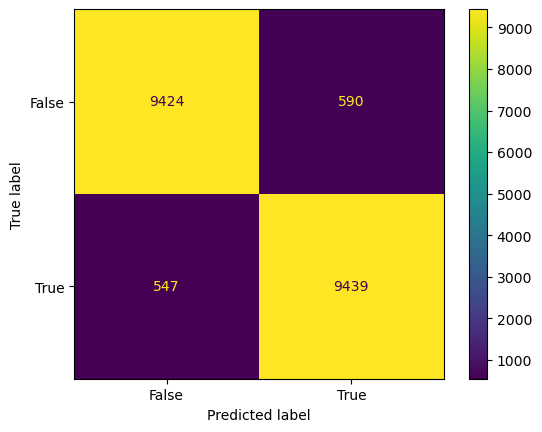

In [359]:

confusion_matrix = metrics.confusion_matrix(y_train2, y_hat_logreg)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["False", "True"])
cm_display.plot()
plt.show()

In [362]:
Accuracy = metrics.accuracy_score(y_train2, y_hat_logreg)
print("Accuracy = %f" % Accuracy)
Precision = metrics.precision_score(y_train2, y_hat_logreg)
print("Precision = %f" % Precision)
Sensitivity_recall = metrics.recall_score(y_train2, y_hat_logreg)
print("Sensitivity/Recall = %f" % Sensitivity_recall)
Specificity = metrics.recall_score(y_train2, y_hat_logreg,pos_label=0)
print("Specificity = %f" % Specificity)
F1_score = metrics.f1_score(y_train2, y_hat_logreg)
print("F1 score = %f" % F1_score)

Accuracy = 0.943150
Precision = 0.941171
Sensitivity/Recall = 0.945223
Specificity = 0.941082
F1 score = 0.943193


In [381]:
new_clean_classification = clean_regression.copy()

In [374]:
print(new_clean_classification["total_sales_price"][200000])

16186


In [382]:
for i in range(len(new_clean_classification)):
  if new_clean_classification['total_sales_price'][i] < 731:
    new_clean_classification['total_sales_price'][i] = 0
  elif new_clean_classification['total_sales_price'][i] < 865:
    new_clean_classification['total_sales_price'][i] = 1
  elif new_clean_classification['total_sales_price'][i] < 1001:
    new_clean_classification['total_sales_price'][i] = 2
  elif new_clean_classification['total_sales_price'][i] < 1157:
    new_clean_classification['total_sales_price'][i] = 3
  elif new_clean_classification['total_sales_price'][i] < 2415:
    new_clean_classification['total_sales_price'][i] = 4
  elif new_clean_classification['total_sales_price'][i] < 3188:
    new_clean_classification['total_sales_price'][i] = 5
  elif new_clean_classification['total_sales_price'][i] < 4583:
    new_clean_classification['total_sales_price'][i] = 6
  elif new_clean_classification['total_sales_price'][i] < 8093:
    new_clean_classification['total_sales_price'][i] = 7
  elif new_clean_classification['total_sales_price'][i] < 16186:
    new_clean_classification['total_sales_price'][i] = 8
  else:
    new_clean_classification['total_sales_price'][i] = 9
    

/var/folders/qh/_8d282g95dz3yjwwq937nb4h0000gn/T/ipykernel_34273/1814799757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_clean_classification['total_sales_price'][i] = 0
/var/folders/qh/_8d282g95dz3yjwwq937nb4h0000gn/T/ipykernel_34273/1814799757.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_clean_classification['total_sales_price'][i] = 1
/var/folders/qh/_8d282g95dz3yjwwq937nb4h0000gn/T/ipykernel_34273/1814799757.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [383]:
new_clean_classification.head(10)

,clarity,carat_weight,lab_GIA,lab_HRD,lab_IGI,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,9,0.09,0,0,1,3,3,62.7,59.0,2.85,2.87,1.79,0
1,9,0.09,0,0,1,3,3,61.9,59.0,2.84,2.89,1.78,0
2,9,0.09,0,0,1,3,3,61.1,59.0,2.88,2.90,1.77,0
3,9,0.09,0,0,1,3,3,62.0,59.0,2.86,2.88,1.78,0
4,9,0.09,0,0,1,3,4,64.9,58.5,2.79,2.83,1.82,0
5,9,0.09,0,0,1,3,3,60.8,57.0,2.95,2.99,1.81,0
6,9,0.09,0,0,1,3,3,64.0,57.0,2.85,2.88,1.84,0
7,9,0.09,0,0,1,3,3,62.1,59.5,2.86,2.89,1.78,0
8,9,0.09,0,0,1,3,3,63.5,59.5,2.89,2.92,1.85,0
9,9,0.09,0,0,1,3,3,63.2,57.0,2.83,2.87,1.80,0


In [384]:

X2 = new_clean_classification[["clarity","carat_weight", "lab_GIA","lab_HRD","symmetry","polish","depth_percent",
                          "table_percent","meas_length","meas_width","meas_depth"]].to_numpy()
y2 = new_clean_classification["total_sales_price"]
#splitting up the data 
X_train, X_test, y_train, y_test = train_test_split(
    X2, y2,   
    test_size = 0.1, random_state=10, shuffle=True
)

In [386]:
X_train_new = X_train[0:20000,:]
y_train_2 = y_train[0:20000]
poly = PolynomialFeatures(2)
X_train2_s = poly.fit_transform(X_train_new)
X_scale2 = preprocessing.StandardScaler().fit_transform(X_train2_s)
logreg = LogisticRegression(C = 1, max_iter=10000,solver="saga")
logreg.fit(X_scale2, y_train_2)
y_hat_logreg = logreg.predict(X_scale2)
acc_logreg = logreg.score(X_scale2, y_train_2)
print("Accuracy on training data = %f" % acc_logreg)

Accuracy on training data = 0.556950


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (2).

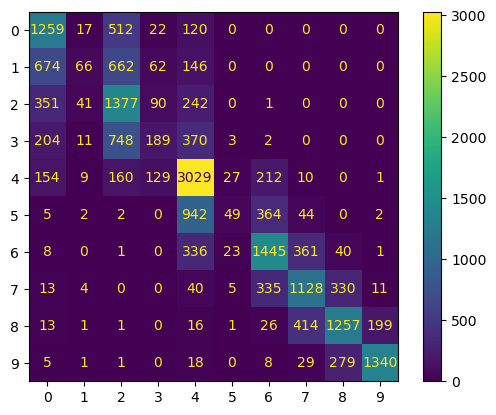

In [387]:
confusion_matrix = metrics.confusion_matrix(y_train_2, y_hat_logreg)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["False", "True"])
cm_display.plot()
plt.show()